In [1]:
import matplotlib.pyplot as plt
import json, math
import numpy as np

def read_info(filepath):
    return json.load(open(filepath, 'r'))

fig_width, fig_height = 5, 4
show_fig_dpi = 100
save_fig_dpi = 600
topk = 10

In [2]:
import colorsys
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# 已有的四种颜色
existing_colors = colors


# 将16进制颜色转换为HSL（色相，饱和度，亮度）
hsl_colors = [ ]
for color in existing_colors:
    c = color[1:]
    hsl_colors.append(colorsys.rgb_to_hls(int(c[0:2], 16)/255.0, int(c[2:4], 16)/255.0, int(c[4:6], 16)/255.0))


# 定义一个函数来生成新颜色
def create_new_hsl(hsl_base, h_shift):
    h, l, s = hsl_base
    h = (h + h_shift) % 1.0
    return h, l, s

# 生成额外的颜色
new_colors = []
h_shift_values = [v * 0.1 for v in range(0, 10)] # 色相调整值，自行调整以生成新颜色
for base_color in hsl_colors:  # 以前四种颜色为基础，生成新颜色
    for h_shift in h_shift_values:
        new_h, new_l, new_s = create_new_hsl(base_color, h_shift)
        # 将HSL转回RGB并格式化为16进制
        new_rgb = colorsys.hls_to_rgb(new_h, new_l, new_s)
        new_hex = '#%02x%02x%02x' % tuple(int(c*255) for c in new_rgb)
        new_colors.append(new_hex)

# 打印出所有颜色，包括新生成的颜色

print("new_colors:", len(new_colors))

new_colors: 40


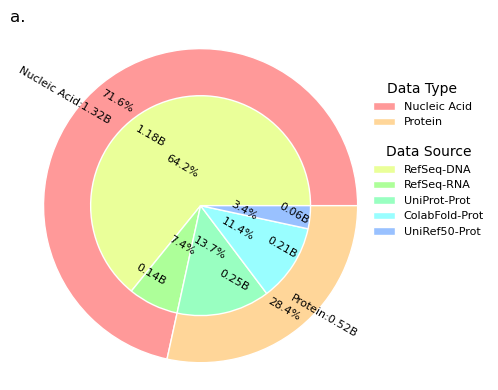

In [27]:
# 数据总体分布图
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

#数据集，p1, p2分别对应外部、内部百分⽐例
p1 = [ 1317445051, 523287512]
p2 = [1181133873, 136311178, 252170925, 208966064, 62150523 ]
labels1 = ['Nucleic Acid', 'Protein', ]
labels2 = ['RefSeq-DNA', 'RefSeq-RNA', 'UniProt-Prot', 'ColabFold-Prot', 'UniRef50-Prot']
text1 = ["Nucleic Acid:1.32B", "Protein:0.52B"]
text2 = ["1.18B", "0.14B", "0.25B", "0.21B", "0.06B"]
patches1, l_text1, p_text1 = plt.pie(p1,
            autopct='%0.1f%%',
            colors=new_colors[:len(labels1)],
            radius=1, # 半径
            labeldistance=0.9,
            pctdistance=0.85, # 百分⽐位置
            wedgeprops=dict(linewidth=1, width=0.8, edgecolor='w'),# 饼图格式：间隔线宽、饼图宽度、边界颜⾊
            labels=text1,
                                     textprops={'rotation': -30}
            )

#设置比例标签字号
for t in l_text1:
    t.set_size(8)
for t in p_text1:
    t.set_size(8)
    
# 绘制内部饼图
patches2,l_text2,p_text2 = plt.pie(p2,
            autopct='%0.1f%%',
            colors=new_colors[len(labels1):len(labels1)+len(labels2)],
            radius=0.7,
            pctdistance=0.4,
            wedgeprops=dict(linewidth=1, width=0.7, edgecolor='w'),
            labels=text2,
            labeldistance=0.7,
            textprops={'rotation': -30})

# 设置图例标题、位置，frameon控制是否显示图例边框，bbox_to_anchor控制图例显示在饼图的外⾯

l1 = plt.legend(labels1, title ='Data Type', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.88))
l2 = plt.legend(patches2, labels2, title ='Data Source', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.70))

plt.gca().add_artist(l1)

#设置比例标签字号
for t in l_text2:
    t.set_size(8)
for t in p_text2:
    t.set_size(8)


# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('a.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
# bbox_inches='tight', pad_inches=0.1,
plt.savefig("./pic/fig.s2-1.png", dpi=save_fig_dpi,  format='png')
plt.savefig("./pic/fig.s2-1.pdf", dpi=save_fig_dpi,  format='pdf')

['Viruses', 'Archaea', 'Eukaryota', 'Bacteria']
labels size: 4


<Figure size 500x400 with 0 Axes>

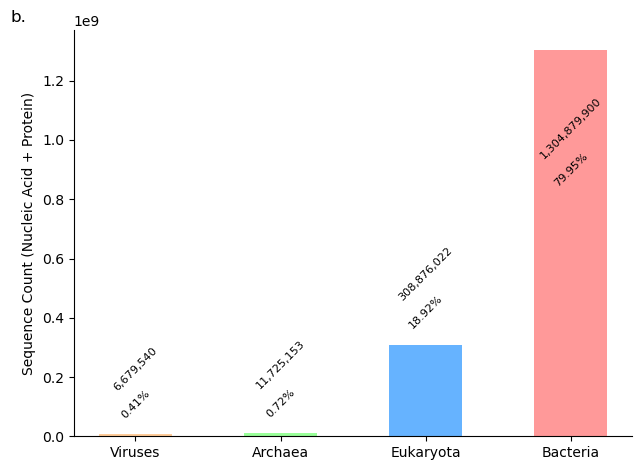

In [4]:
# 数据物种分布（superkingdom)
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_superkingdom_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_superkingdom.txt")["gene"]
gene_superkingdom_num_distribute = gene_superkingdom_info["tax"]
gene_superkingdom_num = sum([item[1] for item in gene_superkingdom_num_distribute.items()])


prot_superkingdom_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_superkingdom.txt")["prot"]
prot_superkingdom_num_distribute = prot_superkingdom_info["tax"]
prot_superkingdom_num = sum([item[1] for item in prot_superkingdom_num_distribute.items()])

superkingdom_num = gene_superkingdom_num + prot_superkingdom_num

superkingdom_num_distribute = {}
for item in gene_superkingdom_num_distribute.items():
    k = item[0]
    v = item[1]
    if k not in superkingdom_num_distribute:
        superkingdom_num_distribute[k] = v
    else:
        superkingdom_num_distribute[k] += v


for item in prot_superkingdom_num_distribute.items():
    k = item[0]
    v = item[1]
    if k not in superkingdom_num_distribute:
        superkingdom_num_distribute[k] = v
    else:
        superkingdom_num_distribute[k] += v


# Pie 数据
superkingdom_num_distribute = sorted(superkingdom_num_distribute.items(), key=lambda x:x[1])
labels = [item[0] for item in superkingdom_num_distribute]
print(labels)
print("labels size: %d" % len(labels))
sizes = [item[1] for item in superkingdom_num_distribute] # 每一块的比例


x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, sizes, width, color=colors[::-1])
# Add some text for labels, title and custom x-axis tick labels, etc.
# ,fontsize=8
ax.set_ylabel('Sequence Count (Nucleic Acid + Protein)')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        if rect_idx < len(rects) - 1:
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 30),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/superkingdom_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 10),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
        else:
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -80),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/superkingdom_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -100),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            


autolabel(rects)
title_obj = plt.title('b.') 
title_obj.set_position([-0.1, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s2-2.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s2-2.pdf", dpi=save_fig_dpi, format='pdf')

dict_keys([10, 8, 6, 9, 5, 7, 4, 3, 2, 1])
dict_keys([3, 2, 1, 0])


<Figure size 500x400 with 0 Axes>

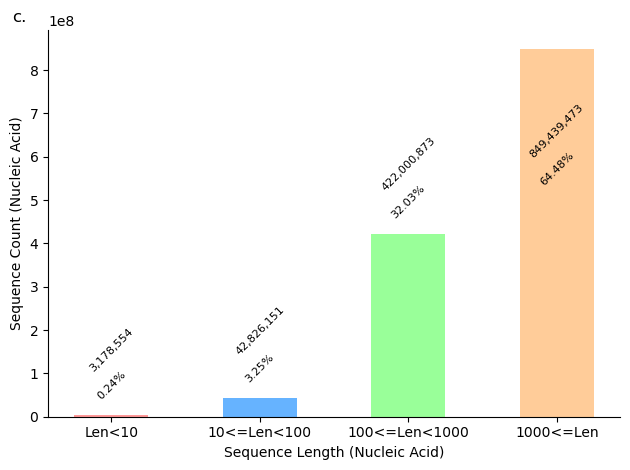

In [5]:
# 核酸序列长度统计
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_seq_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_seq.txt")["gene"]
gene_seq_len_distribute = gene_seq_info["seq_len"]
gene_seq_num = gene_seq_info["seq_num"]
gene_seq_len_distribute = {int(k):v for k,v in gene_seq_len_distribute.items()}
gene_seq_len_distribute_log2 = {}
gene_seq_len_distribute_log10 = {}
for item in gene_seq_len_distribute.items():
    k_log2 = int(math.log2(item[0]))
    k_log10 = int(math.log10(item[0]))
    if k_log2 not in gene_seq_len_distribute_log2:
        gene_seq_len_distribute_log2[k_log2] = 0
    gene_seq_len_distribute_log2[k_log2] += item[1]
    if k_log10 not in gene_seq_len_distribute_log10:
        gene_seq_len_distribute_log10[k_log10] = 0
    gene_seq_len_distribute_log10[k_log10] += item[1]
print(gene_seq_len_distribute_log2.keys())
print(gene_seq_len_distribute_log10.keys())


# 数据
labels = sorted(list(set(gene_seq_len_distribute_log10.keys())))
# show_labels = ["(,10)", "[10, 100)", "[100, 1000)", "[1000,)"]
show_labels = ["Len<10", "10<=Len<100", "100<=Len<1,000", "1,000<=Len"]
sizes = [gene_seq_len_distribute_log10[v] for v in labels]  # 每一块的比例

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, sizes, width, color=colors)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sequence Count (Nucleic Acid)')
# ax.set_title('Scores by group and gender')
ax.set_xlabel('Sequence Length (Nucleic Acid)')
ax.set_xticks(x)
ax.set_xticklabels(show_labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        if rect_idx < len(rects) - 1:
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 30),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/gene_seq_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 10),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
        else:
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -80),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/gene_seq_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -100),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            


autolabel(rects)
title_obj = plt.title('c.') 
title_obj.set_position([-0.05, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s2-3.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s2-3.pdf", dpi=save_fig_dpi, format='pdf')

dict_keys([7, 8, 6, 5, 9, 10, 3, 11, 4, 12, 14, 13, 15, 2, 1])
dict_keys([2, 1, 3, 0])


<Figure size 500x400 with 0 Axes>

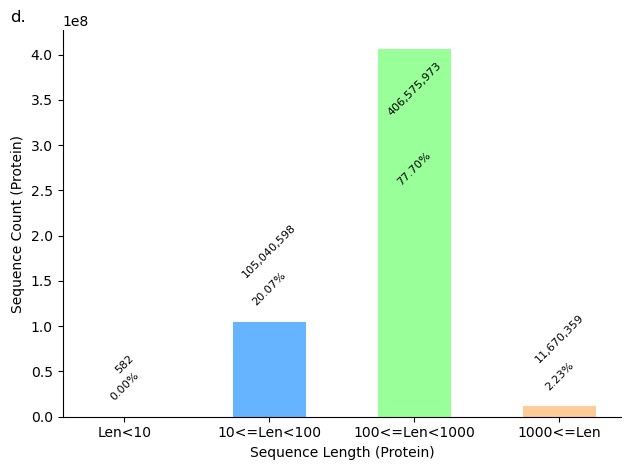

In [28]:
# 蛋白序列长度统计
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_seq_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_seq.txt")["prot"]
prot_seq_len_distribute = prot_seq_info["seq_len"]
prot_seq_num = prot_seq_info["seq_num"]
prot_seq_len_distribute = {int(k):v for k,v in prot_seq_len_distribute.items()}
prot_seq_len_distribute_log2 = {}
prot_seq_len_distribute_log10 = {}
for item in prot_seq_len_distribute.items():
    k_log2 = int(math.log2(item[0]))
    k_log10 = int(math.log10(item[0]))
    if k_log10 > 3:
        k_log10 = 3
    if k_log2 not in prot_seq_len_distribute_log2:
        prot_seq_len_distribute_log2[k_log2] = 0
    prot_seq_len_distribute_log2[k_log2] += item[1]
    if k_log10 not in prot_seq_len_distribute_log10:
        prot_seq_len_distribute_log10[k_log10] = 0
    prot_seq_len_distribute_log10[k_log10] += item[1]
print(prot_seq_len_distribute_log2.keys())
print(prot_seq_len_distribute_log10.keys())


# Pie chart 数据
labels = sorted(list(set(prot_seq_len_distribute_log10.keys())))
# show_labels = ["(,10)", "[10, 100)", "[100, 1000)", "[1000,)"]
show_labels = ["Len<10", "10<=Len<100", "100<=Len<1,000", "1,000<=Len"]
sizes = [prot_seq_len_distribute_log10[v] for v in labels]  # 每一块的比例

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, sizes, width, color=colors)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sequence Count (Protein)')
ax.set_xlabel('Sequence Length (Protein)')
ax.set_xticks(x)
ax.set_xticklabels(show_labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        if rect_idx != len(rects) - 2:
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 30),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/prot_seq_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 10),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
        else:
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -50),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/prot_seq_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -100),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            


autolabel(rects)
title_obj = plt.title('d.') 
title_obj.set_position([-0.08, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s2-4.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s2-4.pdf", dpi=save_fig_dpi, format='pdf')

labels size: 5


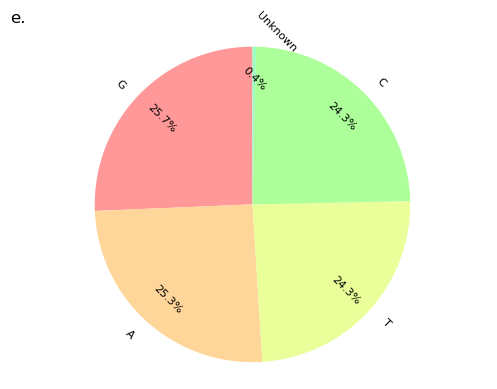

In [7]:
# 核酸Token统计
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_token_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_token.txt")["gene"]
gene_token_len_distribute = gene_token_info["token"]
gene_token_num = gene_token_info["token_num"]
gene_token_len_distribute_new = {}
for item in gene_token_len_distribute.items():
    char = item[0].upper()
    if char == "U":
        char = "T"
    elif char not in ['A', 'T', 'C', 'G']:
        char = 'Unknown'
    if char not in gene_token_len_distribute_new:
        gene_token_len_distribute_new[char] = 0
    gene_token_len_distribute_new[char] += item[1]

# Pie chart 数据
gene_token_len_distribute_new = sorted(gene_token_len_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in gene_token_len_distribute_new]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in gene_token_len_distribute_new] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
                                 labels=labels, 
                                 colors=new_colors,
                                 autopct='%1.1f%%', 
                                 pctdistance=0.8, 
                                 startangle=90, 
                                 textprops={'rotation': -45}
                                )
# plt.legend(labels, title ='Nucleotide', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
# plt.legend(labels, loc='best', title ='Nucleotide', fontsize=8, frameon=False)

#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('e.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s2-5.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s2-5.pdf", dpi=save_fig_dpi, format='pdf')

labels size: 25


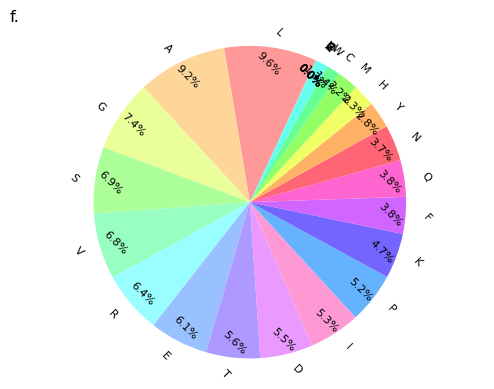

In [8]:
# 蛋白Token统计
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_token_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_token.txt")["prot"]
prot_token_len_distribute = prot_token_info["token"]
prot_token_num = prot_token_info["token_num"]


# Pie chart 数据
prot_token_len_distribute = sorted(prot_token_len_distribute.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in prot_token_len_distribute]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in prot_token_len_distribute] # 每一块的比例
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # 每一块的颜色
#explode = (0.1, 0, 0, 0)  # 只有第一块突出显示，数值表示突出的范围

# 画饼图 shadow=True,explode=explode, colors=colors, rotation:'horizontal', 'vertical' , 'weight': 'bold', 'color': 'white'
patches, l_text, p_text = plt.pie(
    sizes, 
    colors=new_colors,
    labels=labels, 
    autopct='%1.1f%%', 
    pctdistance=0.9, 
    startangle=65, 
    textprops={'rotation': -45}
)
# plt.legend(labels, title ='Amino Acid', fontsize=8, ncol=2, frameon=False, bbox_to_anchor=(0.95, 0.9))
# plt.legend(labels, loc='best', title ='Amino Acid', ncol=2, fontsize=8, frameon=False)

#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
plt.axis('equal') 
title_obj = plt.title('f.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s2-6.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s2-6.pdf", dpi=save_fig_dpi, format='pdf')

gene_total_num: 1317445051
gene_type_exists_num: 1231008506
gene_order_exists_num: 1316719061
prot_total_num: 523287512
prot_order_exists_num: 306633578
prot_site_exists_num: 41135177
prot_homo_exists_num: 183292466
prot_domain_exists_num: 165230192
prot_keyword_exists_num: 230532433
prot_structure_exists_num: 766610


<Figure size 500x400 with 0 Axes>

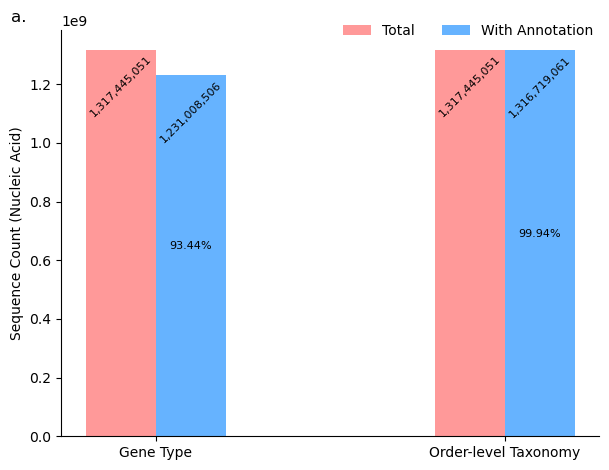

<Figure size 500x400 with 0 Axes>

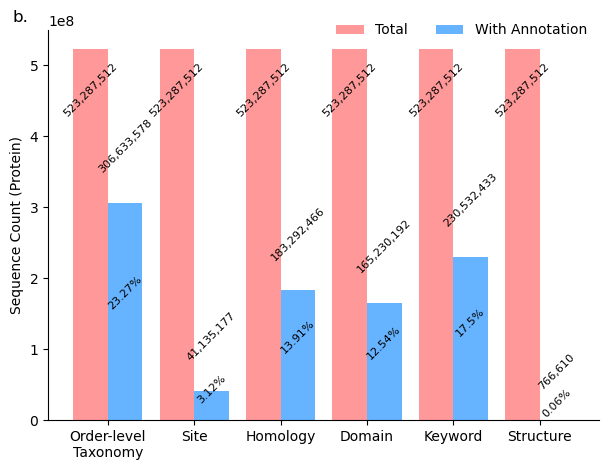

In [29]:
# 数据注释缺失性统计
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_seq_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_seq.txt")["gene"]
gene_total_num = gene_seq_info["seq_num"]
print("gene_total_num: %d" % gene_total_num)

gene_gene_type_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_gene_type.txt")["gene"]
gene_type_exists_num = gene_gene_type_info["gene_type_exists_num"]
print("gene_type_exists_num: %d" % gene_type_exists_num)

gene_order_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_taxonomy.txt")["gene"]
gene_order_exists_num = gene_order_info["order_exists_num"]
print("gene_order_exists_num: %d" % gene_order_exists_num)

prot_seq_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_seq.txt")["prot"]
prot_total_num = prot_seq_info["seq_num"]
print("prot_total_num: %d" % prot_total_num)

prot_order_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_taxonomy.txt")["prot"]
prot_order_exists_num = prot_order_info["order_exists_num"]
print("prot_order_exists_num: %d" % prot_order_exists_num)

prot_site_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_site.txt")["prot"]
prot_site_exists_num = prot_site_info["site_exists_num"]
print("prot_site_exists_num: %d" % prot_site_exists_num)

prot_homo_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_homo.txt")["prot"]
prot_homo_exists_num = prot_homo_info["homo_exists_num"]
print("prot_homo_exists_num: %d" % prot_homo_exists_num)

prot_domain_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_domain.txt")["prot"]
prot_domain_exists_num = prot_domain_info["domain_exists_num"]
print("prot_domain_exists_num: %d" % prot_domain_exists_num)

prot_keyword_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_keyword.txt")["prot"]
prot_keyword_exists_num = prot_keyword_info["keyword_exists_num"]
print("prot_keyword_exists_num: %d" % prot_keyword_exists_num)

prot_structure_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_structure.txt")["prot"]
prot_structure_exists_num = prot_structure_info["structure_exists_num"]
print("prot_structure_exists_num: %d" % prot_structure_exists_num)


labels = ['Gene Type', 'Order-level Taxonomy']
totals = [gene_total_num, gene_total_num]
exists = [gene_type_exists_num, gene_order_exists_num]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, totals, width, label='Total', color=colors[0])
rects2 = ax.bar(x + width/2, exists, width, label='With Annotation', color=colors[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sequence Count (Nucleic Acid)')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(loc = 'upper center', frameon=False)
ax.legend(bbox_to_anchor=(0.5, 0.95), ncol=2, frameon=False)

def autolabel(rects, flag):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{:,d}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -50),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation=45,
                        fontsize=8)
        if flag:
            ax.annotate('{}%'.format(round(height*100/gene_total_num, 2)),
                    xy = (rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                        fontsize=8)
            


autolabel(rects1, flag=False)
autolabel(rects2, flag=True)
title_obj = plt.title('a.') 
title_obj.set_position([-0.08, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-1(1).png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-1(1).pdf", dpi=save_fig_dpi, format='pdf')


fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

labels = ['Order-level\nTaxonomy', 'Site', 'Homology', 'Domain', 'Keyword', "Structure"]
totals = [prot_total_num, prot_total_num, prot_total_num, prot_total_num, prot_total_num, prot_total_num]
exists = [prot_order_exists_num, prot_site_exists_num, prot_homo_exists_num, prot_domain_exists_num, prot_keyword_exists_num, prot_structure_exists_num]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, totals, width, label='Total', color=colors[0])
rects2 = ax.bar(x + width/2, exists, width, label='With Annotation', color=colors[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sequence Count (Protein)')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(bbox_to_anchor=(0.9, 0.9), frameon=False)
ax.legend(bbox_to_anchor=(0.5, 0.95), ncol=2, frameon=False)

def autolabel(rects, flag):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        
        if flag:
            ax.annotate('{:,d}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 20),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation = 45,
                        fontsize=8)
            ax.annotate('{}%'.format(round(height*100/gene_total_num, 2)),
                    xy = (rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation = 45,
                        fontsize=8)
        else:
            ax.annotate('{:,d}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -50),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation = 45,
                        fontsize=8)
            


autolabel(rects1, flag=False)
autolabel(rects2, flag=True)

title_obj = plt.title('b.') 
title_obj.set_position([-0.05, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-2(1).png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-2(1).pdf", dpi=save_fig_dpi, format='pdf')


gene_total_num: 1317445051
gene_type_exists_num: 1231008506
gene_order_exists_num: 1316719061
prot_total_num: 523287512
prot_order_exists_num: 306633578
prot_site_exists_num: 41135177
prot_homo_exists_num: 183292466
prot_domain_exists_num: 165230192
prot_keyword_exists_num: 230532433
prot_structure_exists_num: 766610


<Figure size 500x400 with 0 Axes>

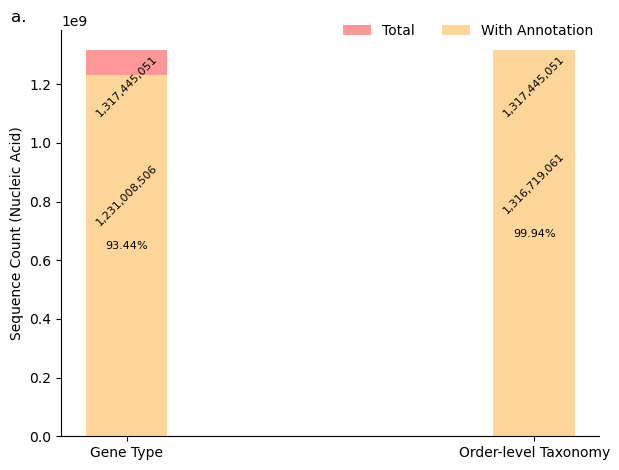

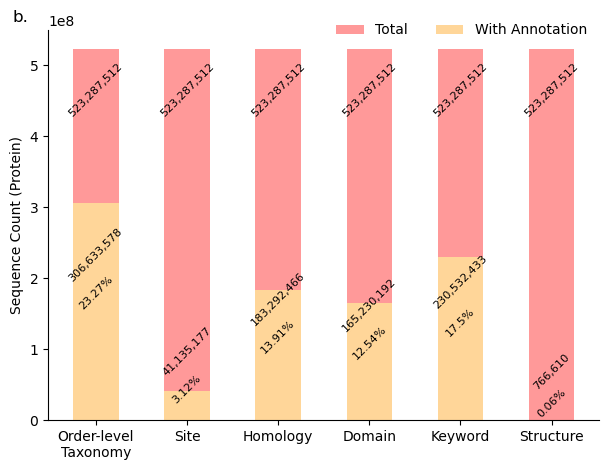

In [30]:
# 数据缺失性统计2
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_seq_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_seq.txt")["gene"]
gene_total_num = gene_seq_info["seq_num"]
print("gene_total_num: %d" % gene_total_num)

gene_gene_type_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_gene_type.txt")["gene"]
gene_type_exists_num = gene_gene_type_info["gene_type_exists_num"]
print("gene_type_exists_num: %d" % gene_type_exists_num)

gene_order_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_taxonomy.txt")["gene"]
gene_order_exists_num = gene_order_info["order_exists_num"]
print("gene_order_exists_num: %d" % gene_order_exists_num)

prot_seq_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_seq.txt")["prot"]
prot_total_num = prot_seq_info["seq_num"]
print("prot_total_num: %d" % prot_total_num)

prot_order_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_taxonomy.txt")["prot"]
prot_order_exists_num = prot_order_info["order_exists_num"]
print("prot_order_exists_num: %d" % prot_order_exists_num)

prot_site_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_site.txt")["prot"]
prot_site_exists_num = prot_site_info["site_exists_num"]
print("prot_site_exists_num: %d" % prot_site_exists_num)

prot_homo_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_homo.txt")["prot"]
prot_homo_exists_num = prot_homo_info["homo_exists_num"]
print("prot_homo_exists_num: %d" % prot_homo_exists_num)

prot_domain_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_domain.txt")["prot"]
prot_domain_exists_num = prot_domain_info["domain_exists_num"]
print("prot_domain_exists_num: %d" % prot_domain_exists_num)

prot_keyword_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_keyword.txt")["prot"]
prot_keyword_exists_num = prot_keyword_info["keyword_exists_num"]
print("prot_keyword_exists_num: %d" % prot_keyword_exists_num)

prot_structure_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_structure.txt")["prot"]
prot_structure_exists_num = prot_structure_info["structure_exists_num"]
print("prot_structure_exists_num: %d" % prot_structure_exists_num)


labels = ['Gene Type', 'Order-level Taxonomy']
totals = [gene_total_num, gene_total_num]
exists = [gene_type_exists_num, gene_order_exists_num]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, totals, width, label='Total', color=new_colors[0])
rects2 = ax.bar(x, exists, width, label='With Annotation', color=new_colors[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sequence Count (Nucleic Acid)')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(loc = 'upper center', frameon=False)
ax.legend(bbox_to_anchor=(0.5, 0.95), ncol=2, frameon=False)

def autolabel(rects, flag):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        
        if flag:
            ax.annotate('{:,d}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 20),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation=45,
                        fontsize=8)
            ax.annotate('{}%'.format(round(height*100/gene_total_num, 2)),
                    xy = (rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                        fontsize=8)
        else:
            ax.annotate('{:,d}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -50),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation=45,
                        fontsize=8)
            


autolabel(rects1, flag=False)
autolabel(rects2, flag=True)
title_obj = plt.title('a.') 
title_obj.set_position([-0.08, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-1(2).png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-1(2).pdf", dpi=save_fig_dpi, format='pdf')



labels = ['Order-level\nTaxonomy', 'Site', 'Homology', 'Domain', 'Keyword', "Structure"]
totals = [prot_total_num, prot_total_num, prot_total_num, prot_total_num, prot_total_num, prot_total_num]
exists = [prot_order_exists_num, prot_site_exists_num, prot_homo_exists_num, prot_domain_exists_num, prot_keyword_exists_num, prot_structure_exists_num]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, totals, width, label='Total', color=new_colors[0])
rects2 = ax.bar(x, exists, width, label='With Annotation', color=new_colors[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sequence Count (Protein)')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend(loc='upper center', ncol=2, frameon=False)
# ax.legend(bbox_to_anchor=(0.6, 0.95), ncol=2, frameon=False)
ax.legend(bbox_to_anchor=(0.5, 0.95), ncol=2, frameon=False)

def autolabel(rects, flag):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        
        if flag:
            ax.annotate('{:,d}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 20),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation = 45,
                        fontsize=8)
            ax.annotate('{}%'.format(round(height*100/gene_total_num, 2)),
                    xy = (rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation = 45,
                        fontsize=8)
        else:
            ax.annotate('{:,d}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -50),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center',
                    va = 'bottom',
                    rotation = 45,
                        fontsize=8)
            


autolabel(rects1, flag=False)
autolabel(rects2, flag=True)
title_obj = plt.title('b.') 
title_obj.set_position([-0.05, 1])

fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-2(2).png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-2(2).pdf", dpi=save_fig_dpi, format='pdf')

labels size: 11


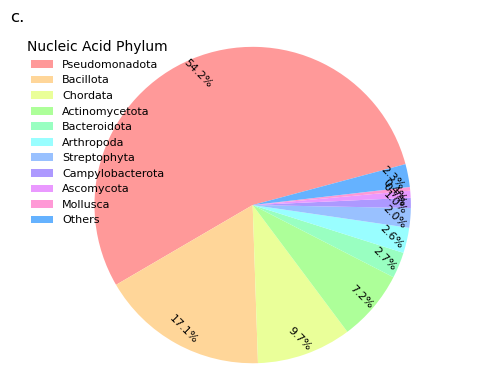

In [11]:
# 核酸物种门分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_phylum_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_phylum.txt")["gene"]
gene_phylum_len_distribute = gene_phylum_info["tax"]
gene_phylum_num = sum([item[1] for item in gene_phylum_len_distribute.items()])


# data
gene_phylum_len_distribute = sorted(gene_phylum_len_distribute.items(), key=lambda x:x[1], reverse=True)
gene_phylum_len_distribute_new = {}
for idx, item in enumerate(gene_phylum_len_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / gene_phylum_num < 0.01:
        k = "Others"
        if k not in gene_phylum_len_distribute_new:
            gene_phylum_len_distribute_new[k] = 0
        gene_phylum_len_distribute_new[k] += v
        
    else:
        gene_phylum_len_distribute_new[k] = v
        
data = sorted(gene_phylum_len_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [gene_phylum_len_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=15, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Nucle Phylum', fontsize=8, frameon=False, bbox_to_anchor=(0.9, 1.0))

plt.legend(labels, loc='best', title ='Nucleic Acid Phylum', fontsize=8, frameon=False)

#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('c.') 
title_obj.set_position([0, 1])
fig.tight_layout() 
# plt.show()
plt.savefig("./pic/fig.s3-3.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-3.pdf", dpi=save_fig_dpi, format='pdf')

labels size: 11


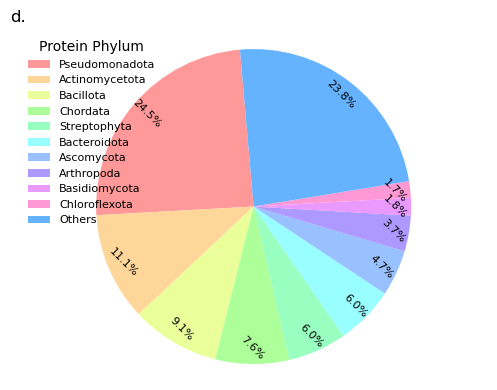

In [12]:
# 蛋白物种门分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_phylum_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_phylum.txt")["prot"]
prot_phylum_len_distribute = prot_phylum_info["tax"]
prot_phylum_num = sum([item[1] for item in prot_phylum_len_distribute.items()])


# data
prot_phylum_len_distribute = sorted(prot_phylum_len_distribute.items(), key=lambda x:x[1], reverse=True)
prot_phylum_len_distribute_new = {}
for idx, item in enumerate(prot_phylum_len_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / prot_phylum_num < 0.01:
        k = "Others"
        if k not in prot_phylum_len_distribute_new:
            prot_phylum_len_distribute_new[k] = 0
        prot_phylum_len_distribute_new[k] += v
        
    else:
        prot_phylum_len_distribute_new[k] = v
        
data = sorted(prot_phylum_len_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [prot_phylum_len_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=95, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Prot Phylum', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Protein Phylum', fontsize=8, frameon=False)

#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)

# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('d.') 
title_obj.set_position([0, 1])
fig.tight_layout() 

# plt.show()
plt.savefig("./pic/fig.s3-4.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-4.pdf", dpi=save_fig_dpi, format='pdf')

labels size: 11


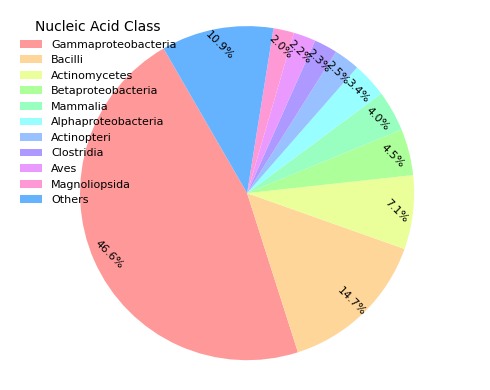

In [13]:
# 核酸物种纲分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_class_name_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_class_name.txt")["gene"]
gene_class_name_len_distribute = gene_class_name_info["tax"]
gene_class_name_num = sum([item[1] for item in gene_class_name_len_distribute.items()])

# data
gene_class_name_len_distribute = sorted(gene_class_name_len_distribute.items(), key=lambda x:x[1], reverse=True)
gene_class_name_len_distribute_new = {}
for idx, item in enumerate(gene_class_name_len_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / gene_class_name_num < 0.01:
        k = "Others"
        if k not in gene_class_name_len_distribute_new:
            gene_class_name_len_distribute_new[k] = 0
        gene_class_name_len_distribute_new[k] += v
        
    else:
        gene_class_name_len_distribute_new[k] = v
        
data = sorted(gene_class_name_len_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [gene_class_name_len_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=120, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Nucle Class', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Nucleic Acid Class', fontsize=8, frameon=False)

#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
fig.tight_layout() 
plt.show()

labels size: 11


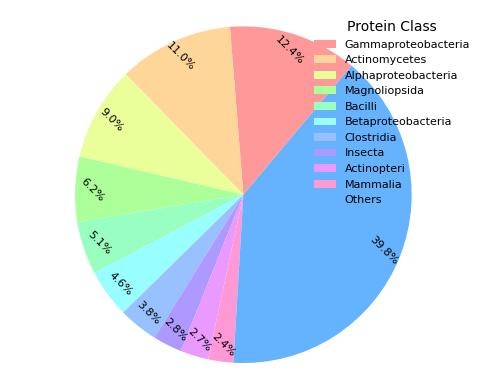

In [14]:
# 蛋白物种纲分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_class_name_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_class_name.txt")["prot"]
prot_class_name_len_distribute = prot_class_name_info["tax"]
prot_class_name_num = sum([item[1] for item in prot_class_name_len_distribute.items()])


# data
prot_class_name_len_distribute = sorted(prot_class_name_len_distribute.items(), key=lambda x:x[1], reverse=True)
prot_class_name_len_distribute_new = {}
for idx, item in enumerate(prot_class_name_len_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / prot_class_name_num < 0.01:
        k = "Others"
        if k not in prot_class_name_len_distribute_new:
            prot_class_name_len_distribute_new[k] = 0
        prot_class_name_len_distribute_new[k] += v
        
    else:
        prot_class_name_len_distribute_new[k] = v
        
data = sorted(prot_class_name_len_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [prot_class_name_len_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=50, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Prot Class', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Protein Class', fontsize=8, frameon=False)

#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
fig.tight_layout() 
plt.show()

1249775832 1231008506
labels size: 8


<Figure size 500x400 with 0 Axes>

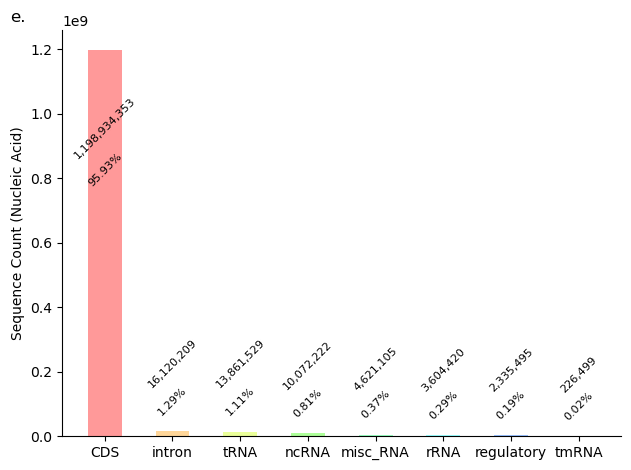

In [31]:
# 核酸-8种区间类型分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_gene_type_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_gene_type.txt")["gene"]
gene_gene_type_distribute = gene_gene_type_info["gene_type"]
gene_gene_type_num = sum([item[1] for item in gene_gene_type_distribute.items()])
gene_type_exists_num = gene_gene_type_info["gene_type_exists_num"]
print(gene_gene_type_num, gene_type_exists_num)

# data
gene_gene_type_distribute = sorted(gene_gene_type_distribute.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in gene_gene_type_distribute]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in gene_gene_type_distribute] # 每一块的比例

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, sizes, width, color=new_colors[:len(labels)])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sequence Count (Nucleic Acid)')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend(loc = 'upper right',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect_idx, rect in enumerate(rects):
        height = rect.get_height()
        if rect_idx == 0:
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -80),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/gene_gene_type_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -100),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            
        else:
            
            ax.annotate('{:,d}'.format(height),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 30),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)
            ax.annotate("%0.2f%%" % ((100 * height)/gene_gene_type_num),
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 10),  # 3 points vertical offset
                        textcoords = "offset points",
                        ha = 'center',
                        va = 'bottom',
                        rotation = 45,
                        fontsize=8)


autolabel(rects)
title_obj = plt.title('e.') 

title_obj.set_position([-0.08, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-5.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-5.pdf", dpi=save_fig_dpi, format='pdf')

1316719061 1316719061
labels size: 11


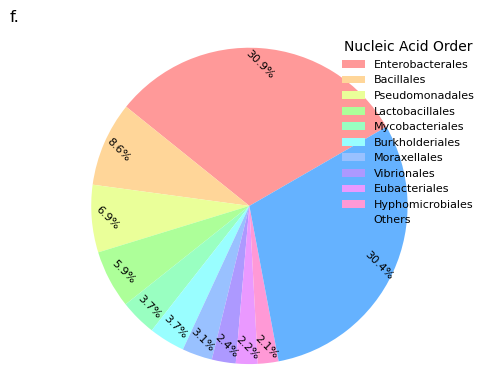

In [16]:
# 核酸物种目分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

gene_order_info = read_info("./data/lucaone_v2_data_gene_lucaone_v2_stats_taxonomy.txt")["gene"]
gene_order_distribute = gene_order_info["order"]
gene_order_num = sum([item[1] for item in gene_order_distribute.items()])
order_exists_num = gene_order_info["order_exists_num"]
print(gene_order_num, order_exists_num)

# data
gene_order_distribute = sorted(gene_order_distribute.items(), key=lambda x:x[1], reverse=True)
'''
gene_order_distribute_new = []
for item_idx, item in enumerate(gene_order_distribute):
    if item_idx < 20:
        gene_order_distribute_new.append([item[0], item[1]])

labels = [item[0] for item in gene_order_distribute_new]
sizes = [item[1] for item in gene_order_distribute_new] # 每一块的比例
'''
gene_order_distribute_new = {}
for idx, item in enumerate(gene_order_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / gene_order_num < 0.01:
        k = "Others"
        if k not in gene_order_distribute_new:
            gene_order_distribute_new[k] = 0
        gene_order_distribute_new[k] += v
        
    else:
        gene_order_distribute_new[k] = v
        
data = sorted(gene_order_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [gene_order_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=30, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Nucle Order Tax', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Nucleic Acid Order', fontsize=8, frameon=False)

#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('f.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-6.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-6.pdf", dpi=save_fig_dpi, format='pdf')

306633578 306633578
labels size: 11


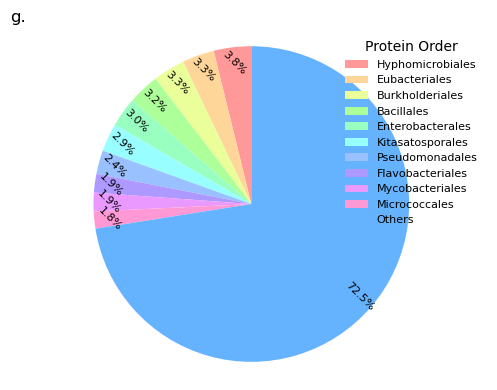

In [17]:
# 蛋白物种目分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_order_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_taxonomy.txt")["prot"]
prot_order_distribute = prot_order_info["order"]
prot_order_num = sum([item[1] for item in prot_order_distribute.items()])
order_exists_num = prot_order_info["order_exists_num"]
print(prot_order_num, order_exists_num)

# data
prot_order_distribute = sorted(prot_order_distribute.items(), key=lambda x:x[1], reverse=True)
'''
prot_order_distribute_new = []
for item_idx, item in enumerate(prot_order_distribute):
    if item_idx < 20:
        prot_order_distribute_new.append([item[0], item[1]])
labels = [item[0] for item in prot_order_distribute_new]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in prot_order_distribute_new] # 每一块的比例
'''
prot_order_distribute_new = {}
for idx, item in enumerate(prot_order_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / prot_order_num < 0.01:
        k = "Others"
        if k not in prot_order_distribute_new:
            prot_order_distribute_new[k] = 0
        prot_order_distribute_new[k] += v
        
    else:
        prot_order_distribute_new[k] = v
        
data = sorted(prot_order_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [prot_order_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=90, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Prot Order Tax', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Protein Order', fontsize=8, frameon=False)
#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('g.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-7.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-7.pdf", dpi=save_fig_dpi, format='pdf')

813412274 230532433
labels size: 11


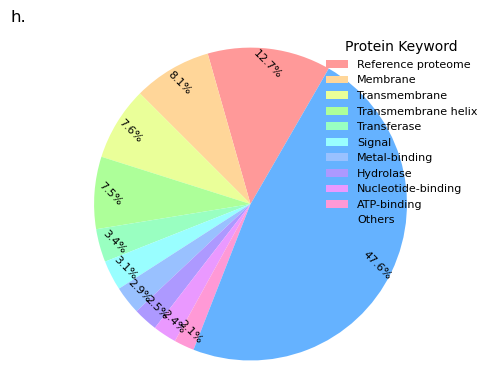

In [18]:
# 蛋白keyword分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)
prot_keyword_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_keyword.txt")["prot"]
prot_keyword_distribute = prot_keyword_info["keyword"]
prot_keyword_num = sum([item[1] for item in prot_keyword_distribute.items()])
keyword_exists_num = prot_keyword_info["keyword_exists_num"]
print(prot_keyword_num, keyword_exists_num)

# data
prot_keyword_distribute = sorted(prot_keyword_distribute.items(), key=lambda x:x[1], reverse=True)
'''
prot_keyword_distribute_new = []
for item_idx, item in enumerate(prot_keyword_distribute):
    if item_idx < 20:
        prot_keyword_distribute_new.append([item[0], item[1]])
        
labels = [item[0] for item in prot_keyword_distribute_new]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in prot_keyword_distribute_new] # 每一块的比例
'''

prot_keyword_distribute_new = {}
for idx, item in enumerate(prot_keyword_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / prot_keyword_num < 0.01:
        k = "Others"
        if k not in prot_keyword_distribute_new:
            prot_keyword_distribute_new[k] = 0
        prot_keyword_distribute_new[k] += v
        
    else:
        prot_keyword_distribute_new[k] = v
        
data = sorted(prot_keyword_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [prot_keyword_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=60, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Port Keyword', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Protein Keyword', fontsize=8, frameon=False)
#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('h.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-8.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-8.pdf", dpi=save_fig_dpi, format='pdf')

45870641 41135177
labels size: 11


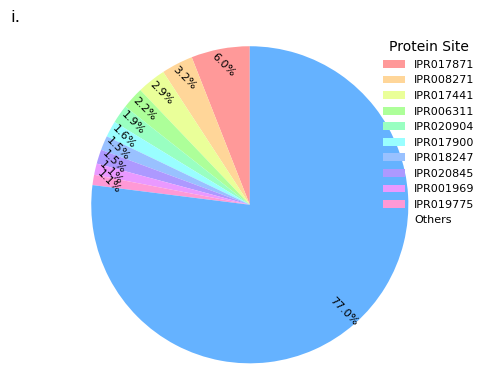

In [19]:
# 蛋白site分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_site_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_site.txt")["prot"]
prot_site_distribute = prot_site_info["site"]
prot_site_num = sum([item[1] for item in prot_site_distribute.items()])
site_exists_num = prot_site_info["site_exists_num"]
print(prot_site_num, site_exists_num)

# data
prot_site_distribute = sorted(prot_site_distribute.items(), key=lambda x:x[1], reverse=True)
'''
prot_site_distribute_new = []
for item_idx, item in enumerate(prot_site_distribute):
    if item_idx < 20:
        prot_site_distribute_new.append([item[0], item[1]])
    
labels = [item[0] for item in prot_site_distribute_new]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in prot_site_distribute_new] # 每一块的比例
'''

prot_site_distribute_new = {}
for idx, item in enumerate(prot_site_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / prot_site_num < 0.01:
        k = "Others"
        if k not in prot_site_distribute_new:
            prot_site_distribute_new[k] = 0
        prot_site_distribute_new[k] += v
        
    else:
        prot_site_distribute_new[k] = v
        
data = sorted(prot_site_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [prot_site_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=90, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Prot Site', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Protein Site', fontsize=8, frameon=False)
#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('i.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-9.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-9.pdf", dpi=save_fig_dpi, format='pdf')

219159031 165230192
labels size: 11


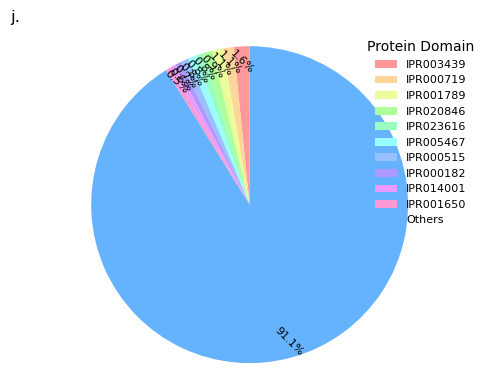

In [20]:
# 蛋白domain分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_domain_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_domain.txt")["prot"]
prot_domain_distribute = prot_domain_info["domain"]
prot_domain_num = sum([item[1] for item in prot_domain_distribute.items()])
domain_exists_num = prot_domain_info["domain_exists_num"]
print(prot_domain_num, domain_exists_num)

# Pie chart 数据
prot_domain_distribute = sorted(prot_domain_distribute.items(), key=lambda x:x[1], reverse=True)
'''
prot_domain_distribute_new = []
for item_idx, item in enumerate(prot_domain_distribute):
    if item_idx < 20:
        prot_domain_distribute_new.append([item[0], item[1]])
labels = [item[0] for item in prot_domain_distribute_new]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in prot_domain_distribute_new] # 每一块的比例
'''

prot_domain_distribute_new = {}
for idx, item in enumerate(prot_domain_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / prot_domain_num < 0.01:
        k = "Others"
        if k not in prot_domain_distribute_new:
            prot_domain_distribute_new[k] = 0
        prot_domain_distribute_new[k] += v
        
    else:
        prot_domain_distribute_new[k] = v
        
data = sorted(prot_domain_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [prot_domain_distribute_new[label] for label in labels] # 每一块的比例

patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=90, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Prot Domain', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 0.9))
plt.legend(labels, loc='best', title ='Protein Domain', fontsize=8, frameon=False)
#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('j.') 
title_obj.set_position([0, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-10.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-10.pdf", dpi=save_fig_dpi, format='pdf')

225069204 183292466
labels size: 11
data size: 256607015, 255864383, 256639946


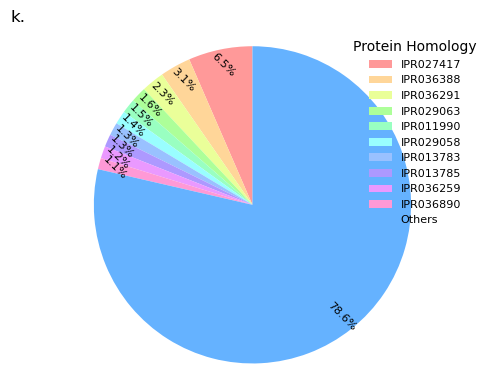

In [21]:
# 蛋白homo分布
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_homo_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_homo.txt")["prot"]
prot_homo_distribute = prot_homo_info["homo"]
prot_homo_num = sum([item[1] for item in prot_homo_distribute.items()])
homo_exists_num = prot_homo_info["homo_exists_num"]
print(prot_homo_num, homo_exists_num)

# Pie chart 数据
prot_homo_distribute = sorted(prot_homo_distribute.items(), key=lambda x:x[1], reverse=True)
'''
prot_homo_distribute_new = []
for item_idx, item in enumerate(prot_homo_distribute):
    if item_idx < 20:
        prot_homo_distribute_new.append([item[0], item[1]])
    
labels = [item[0] for item in prot_homo_distribute_new]
print("labels size: %d" % len(labels))
sizes = [item[1] for item in prot_homo_distribute_new] # 每一块的比例
'''
    
prot_homo_distribute_new = {}
for idx, item in enumerate(prot_homo_distribute):
    k = item[0]
    v = item[1]
    if idx >= topk:
        # if v / prot_homo_num < 0.01:
        k = "Others"
        if k not in prot_homo_distribute_new:
            prot_homo_distribute_new[k] = 0
        prot_homo_distribute_new[k] += v
        
    else:
        prot_homo_distribute_new[k] = v
        
data = sorted(prot_homo_distribute_new.items(), key=lambda x:x[1], reverse=True)
labels = [item[0] for item in data if item[0] != "Others"]
labels.append("Others")
print("labels size: %d" % len(labels))
sizes = [prot_homo_distribute_new[label] for label in labels] # 每一块的比例


patches, l_text, p_text = plt.pie(sizes, 
        # labels=labels, 
        colors=new_colors[:len(labels)], 
        autopct='%1.1f%%', 
        pctdistance=0.9, 
        startangle=90, 
        textprops={'rotation': -45})

# plt.legend(labels, title ='Prot Homo', fontsize=8, frameon=False, bbox_to_anchor=(0.95, 1.0))
plt.legend(labels, loc='best', title ='Protein Homology', fontsize=8, frameon=False)
#设置比例标签字号
for t in l_text:
    t.set_size(8)
for t in p_text:
    t.set_size(8)
print("data size: 256607015, 255864383, 256639946")    
# 画一个圆，确保饼图是圆形的
plt.axis('equal') 
title_obj = plt.title('k.') 
title_obj.set_position([0, 1])
fig.tight_layout()  
plt.savefig("./pic/fig.s3-11.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-11.pdf", dpi=save_fig_dpi, format='pdf')

256607015 255864383 256639946 766610
total: 256607015, 255864383, 256639946
data size: 256607015, 255864383, 256639946


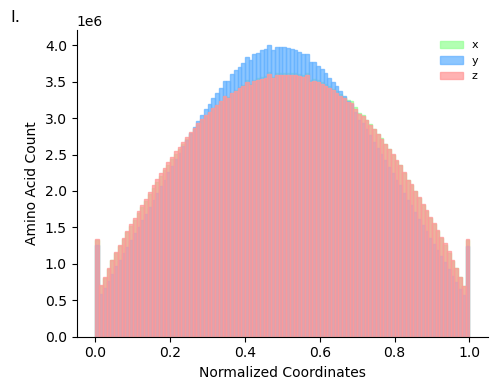

In [22]:
fig = plt.figure(figsize=(fig_width, fig_height), dpi=show_fig_dpi)

prot_structure_info = read_info("./data/lucaone_v2_data_prot_lucaone_v2_stats_structure.txt")["prot"]
prot_structure_distribute_x = prot_structure_info["structure_x"]
prot_structure_num_x = sum([item[1] for item in prot_structure_distribute_x.items()])

prot_structure_distribute_y = prot_structure_info["structure_y"]
prot_structure_num_y = sum([item[1] for item in prot_structure_distribute_y.items()])

prot_structure_distribute_z = prot_structure_info["structure_z"]
prot_structure_num_z = sum([item[1] for item in prot_structure_distribute_z.items()])

structure_exists_num = prot_structure_info["structure_exists_num"]

print(prot_structure_num_x, prot_structure_num_y, prot_structure_num_z, structure_exists_num)
total_x = 0
for item in prot_structure_distribute_x.items():
    total_x += item[1]

total_y = 0
for item in prot_structure_distribute_y.items():
    total_y += item[1]

total_z = 0
for item in prot_structure_distribute_z.items():
    total_z += item[1]
print("total: %d, %d, %d" % (total_x, total_y, total_z))

# 数据
data_x = []
for item in prot_structure_distribute_x.items():
    value = float(item[0])
    for _ in range(item[1]):
        data_x.append(value)

    
data_y = []
for item in prot_structure_distribute_y.items():
    value = float(item[0])
    for _ in range(item[1]):
        data_y.append(value)


data_z = []
for item in prot_structure_distribute_z.items():
    value = float(item[0])
    for _ in range(item[1]):
        data_z.append(value)


print("data size: %d, %d, %d" % (len(data_x), len(data_y), len(data_z)))

# edgecolor='black'
plt.hist(data_x, bins=100, density=False, alpha=0.75, color=colors[2], edgecolor=colors[2], histtype='bar')
plt.hist(data_y, bins=100, density=False, alpha=0.75, color=colors[1], edgecolor=colors[1], histtype='bar')
plt.hist(data_z, bins=100, density=False, alpha=0.75, color=colors[0], edgecolor=colors[0], histtype='bar')

# 添加标题和轴标签
# plt.title('Histogram Example')
plt.xlabel('Normalized Coordinates')
plt.ylabel('Amino Acid Count')
plt.legend(['x', 'y', 'z'], title ='', fontsize=8, frameon=False, loc='best')

# 显示网格（可选）
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
title_obj = plt.title('l.') 
title_obj.set_position([-0.15, 1])
fig.tight_layout()    
# plt.show()
plt.savefig("./pic/fig.s3-12.png", dpi=save_fig_dpi, format='png')
plt.savefig("./pic/fig.s3-12.pdf", dpi=save_fig_dpi, format='pdf')